In [1]:
from brian2 import*
import paintapp
from IPython.display import Video, Image
from opencvtry import cvWriter
import copy
import PlotVoltagesFunctions, MainFunctions, VideoFunctions

%load_ext autoreload
%autoreload 2


c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\setuptools\distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "
INFO       Cache size for target "cython": 7354 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\Victoria\.cython\brian_extensions" directory. [brian2]


## Create, Run and Visualise the Network

In this Jupyter notebook, we:
- 1 - Create the trajectory
- 2 - Create the network and run the experiment
- 3 - Plot the voltages of different group of cells
- 4 - Create a video of the spikes
- 5 - Plot the structure of the network: the connectivity between the neurons
- 6 - See some of the tools that can be used
- 7 - Explore the hyperparameter space

## 1 - Create the trajectory
What to do:
- Run the cell
- Draw in green (default color) a trajectory, in red some extra inputs.
- Close the paintapp.

The method: paintapp.create_trajectory_and_inputs() allows to draw a trajectory (in GREEN), and extra inputs (in RED).
Then the trajectory and inputs are transformed into matrices "trajectory" and "inputs". We will give them in parameters for the creation of our network. 

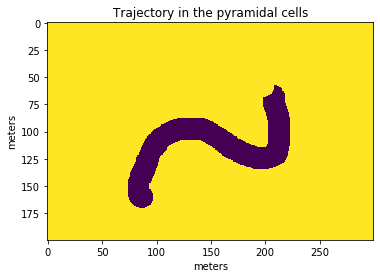

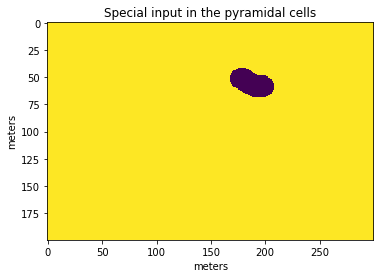

In [2]:
trajectory, inputs = paintapp.create_trajectory_and_inputs()

## 2 - Create the network and run the experiment
Choose some parameters. Creates a network with the function MainFunctions.plot_run() . We must choose between
- model : 'FairhallModel' and 'ThresholdModel'. 
- plasticity : True or False (Decides to introduce plasiticity or not).
- record_ : True or False. If record the activity of all cells or not.
- plot_last_first : True or False. Do we record the activity 
- Duration in ms. Default is 50 * ms.

In [3]:
params = {'trajectory' : trajectory,  
          'inputs' : inputs,
          'rec_weight' : 3.,
          'INPUT_weight': 0,
          'noise_weight' : 0.,
          'R_weight' : 10.,
          'inh_weight_pi' : 0.1,
           'inh_weight_ip' : 0.,
          'tau_dyn_inh' : 10 * ms,
          "P_input_rate" : 200 * Hz,
            "P_weight" : 2.,
          "v_thr_random" : - 50
          
         }

INFO       The synaptic equation for the variable w does not specify whether it should be integrated at every timestep ("clock-driven") or only at spiking events ("event-driven"). It will be integrated at every timestep which can slow down your simulation unnecessarily if you only need the values of this variable whenever a spike occurs. Specify the equation as clock-driven explicitly to avoid this warning. [brian2.synapses.synapses.clock_driven]


yo


WARNING    "v_leak_inh" is an internal variable of group "neurongroup_2", but also exists in the run namespace with the value -10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v_leak_inh" is an internal variable of group "neurongroup_3", but also exists in the run namespace with the value -10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v_leak_random" is an internal variable of group "neurongroup", but also exists in the run namespace with the value -30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
INFO       No numerical integration method specified for group 'synapses_1', using method 'exact' (took 0.62s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.05s). [brian2.stateupdaters.base.method_choice]
WARNING    "v_thr_random

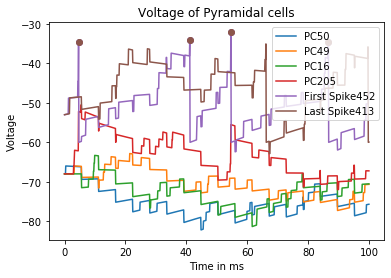

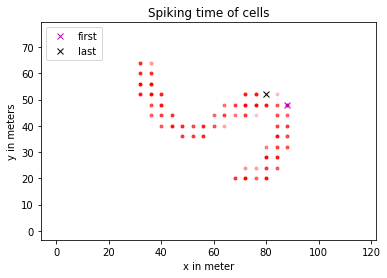

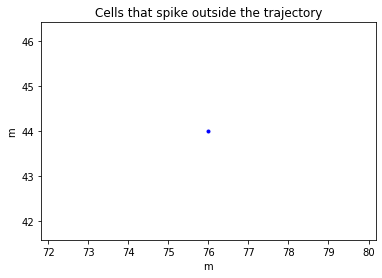

In [4]:
fm1 = MainFunctions.plot_run(params, 'FairhallModel', plasticity=False, record_=True)

## 3 - Plot Voltages
Plots the mean voltage of the group cells (given in the list).
Possible choices : ['PC', 'R' , 'INH', 'threshold','weights' ].

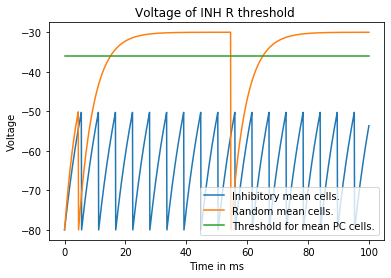

In [6]:
PlotVoltagesFunctions.plot_voltages_mean_other_types(fm1, ['INH', 'R', 'threshold'])

Weights between the pyramidal cells and the Poisson inputs.

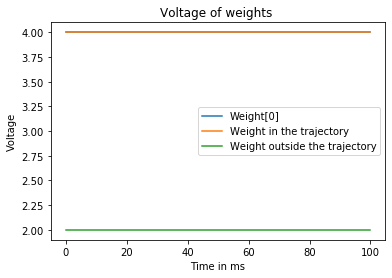

In [7]:
PlotVoltagesFunctions.plot_voltages_other_types(fm1, ['weights'])

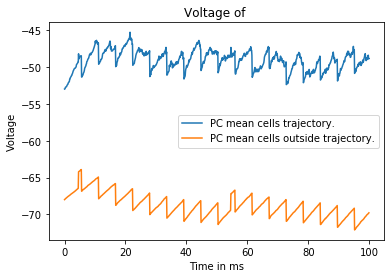

In [10]:
PlotVoltagesFunctions.plot_voltages_mean_trajectory(fm1)

## 4 - Video of spikes
Video of pyramidal cells and their spike times.
The method VideoFunctions.new_spike_times creates a list of frames. Each frame is a matrix with entries 0 if the corresponding cell does not spike. And 255 if it spikes. The list is ordered timewise.
Then the method uploads (on the local folder) a file under "video_spikes.mp4". The video can visualise directly the file by running the second cell.

In [5]:
list_frames, height, width = VideoFunctions.new_spike_times(fm1, filePathName = "./video_spikes.mp4")

100.0
100


In [6]:
video = Video("./video_spikes.mp4",embed=True, width= 10 * width, height= 10 * height)
video

## 5 - Structure of the network
Plot the connectivity of the cells:
- Reccurrent connectivity
- INH inputs, inhibitory inputs
- N inputs, noise 2 higher in the trajectory
- R inputs, random to break synchronity

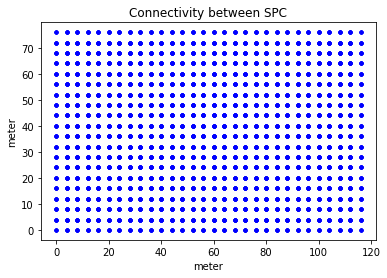

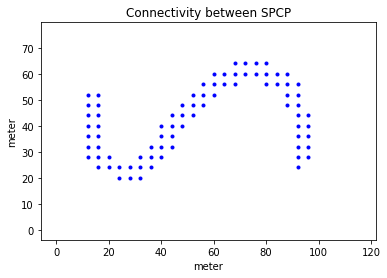

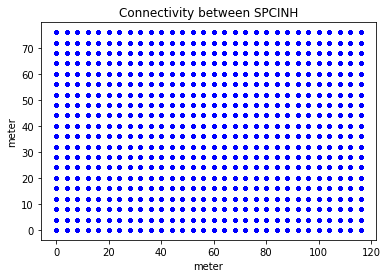

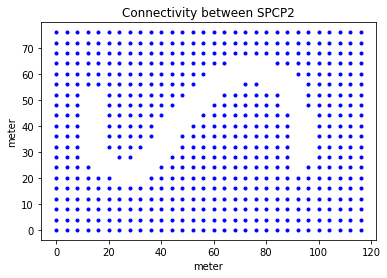

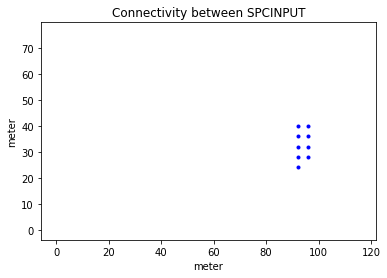

In [27]:
result = functions.plot_all_connectivity(fm1)


# 6 - Some tools

## Distribution of parameters
Plot distribtution of certain parameters:
- Weight parameters
- Delay parameters

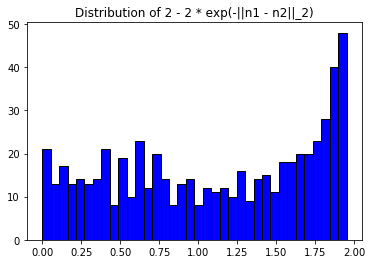

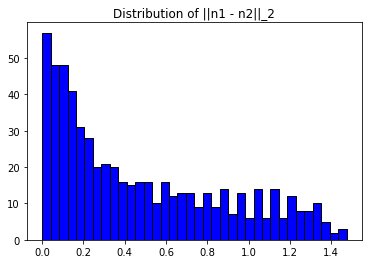

In [111]:
functions.plot_different_distances(fm1)

## Visualise distances
Norm l2 distance.

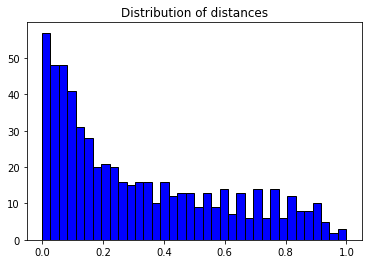

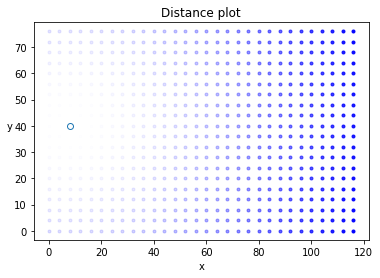

In [207]:
neuron_idx = 50
functions.plot_distance(fm1)

## 7 - Parameter exploration
Can explore the different parameters and their consequences.

In [206]:
n = 3
my_dict = {'rec_weight' : 2.5 ,
            'inh_weight_pi' : 0.1,
            }
step = [0.5, 0.1]

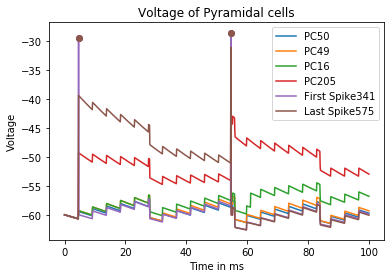

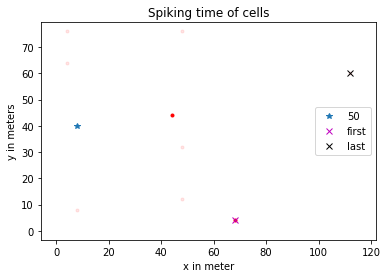

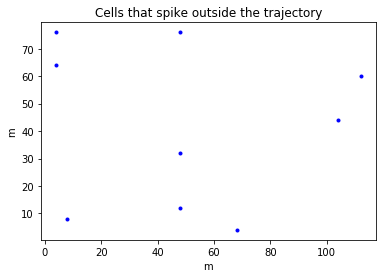

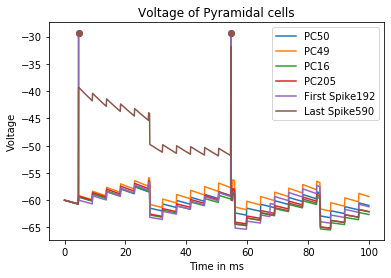

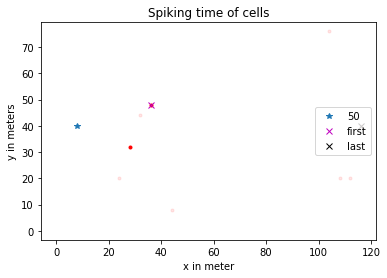

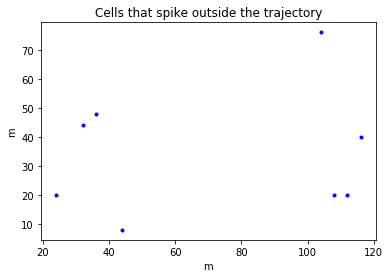

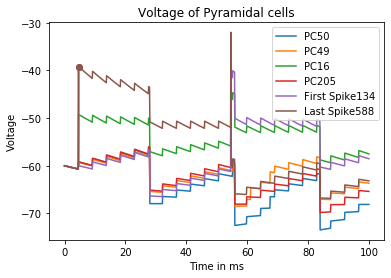

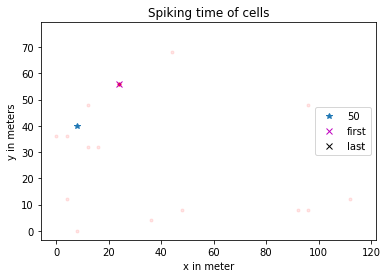

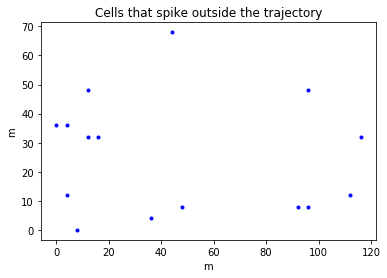

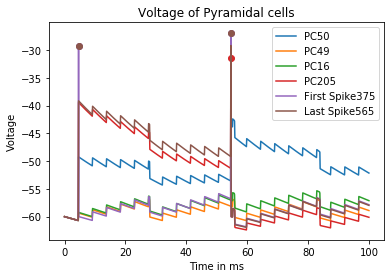

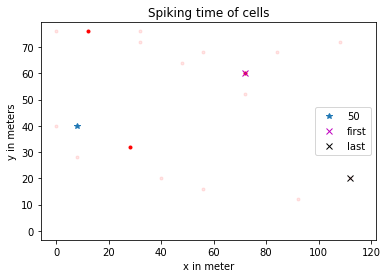

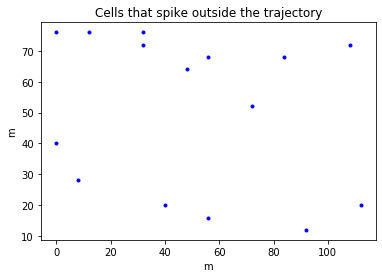

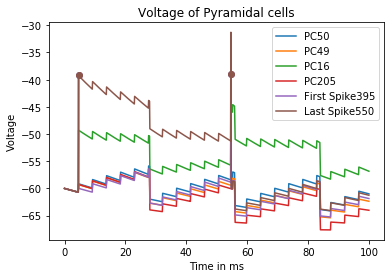

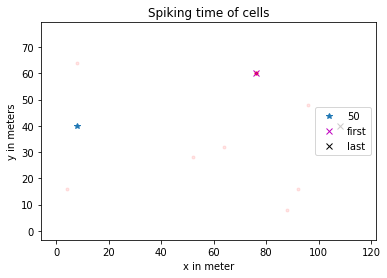

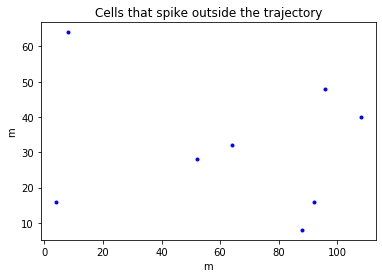

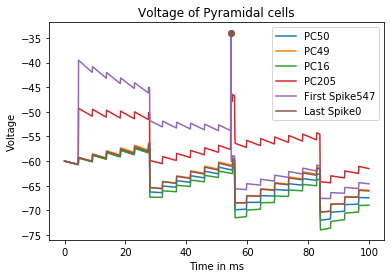

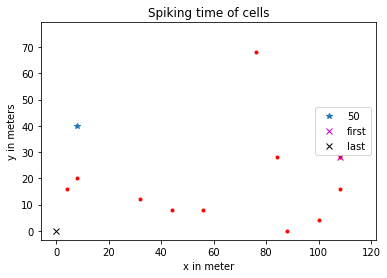

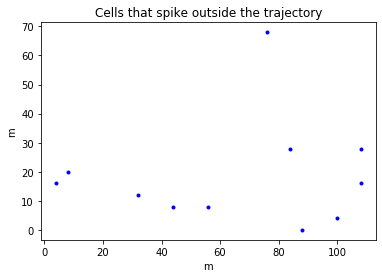

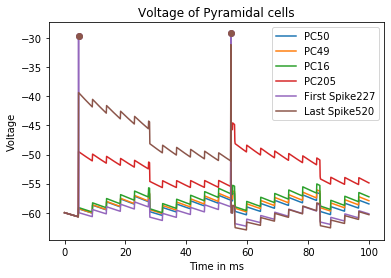

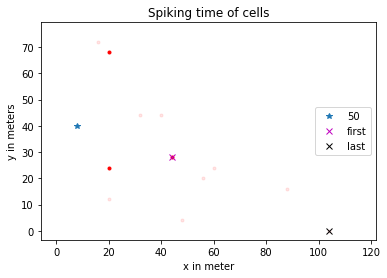

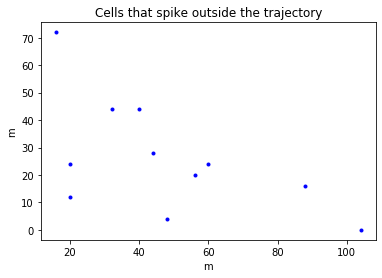

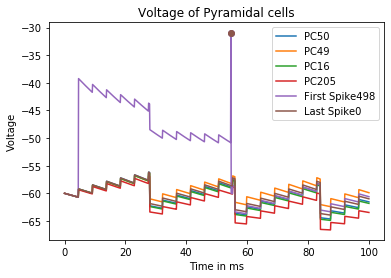

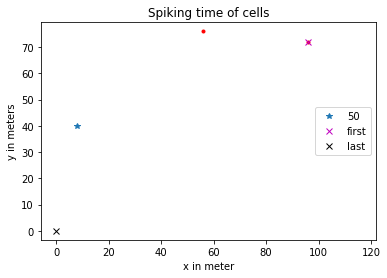

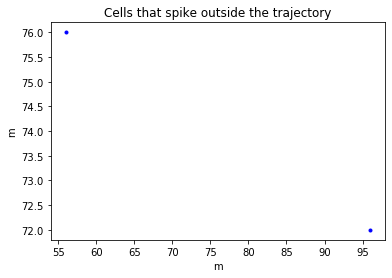

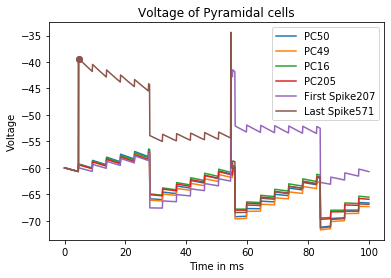

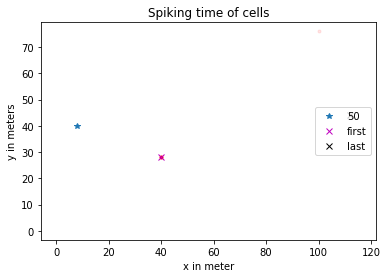

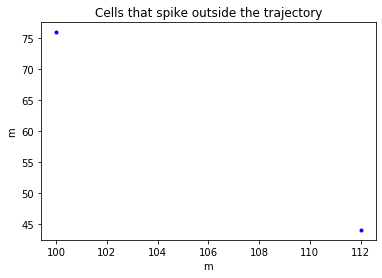

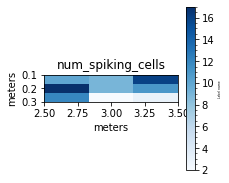

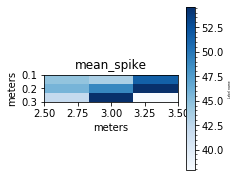

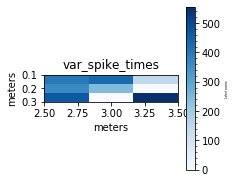

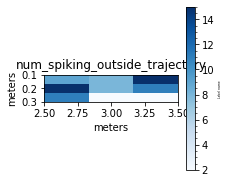

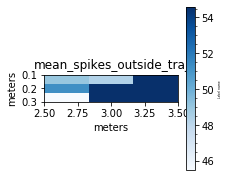

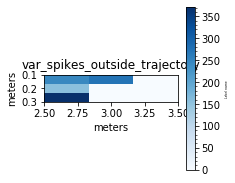

In [207]:
functions.explore_hyperparameters(my_dict=my_dict, step=step, n=n, model="ThresholdModel", trajectory=trajectory)